In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../data/Travel_Cleaned.csv')

In [390]:
df.head()

,Unnamed: 0,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Total_visting
0,0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [391]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['ProdTaken'],axis=1)
y=df['ProdTaken']


In [392]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [393]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((3421, 18), (1467, 18))

In [394]:
cat_features=X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

Preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardsScalar',numeric_transformer,num_features)
    ]
)


In [395]:
X_train=Preprocessor.fit_transform(X_train)
X_test=Preprocessor.transform(X_test)

In [396]:
Preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardsScalar', StandardScaler(),
                                 Index(['Unnamed: 0', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Total_visting'],
      dtype='object'))])

Apply Random Forest Algorthim

In [397]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [398]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 8, 15, 20],
    'min_samples_leaf': [1, 2, 4]
}

In [399]:
randomcv_models = [
    ('RandomForest', RandomForestClassifier(), rf_grid)
]

In [400]:
best_models = {}

for name, model, params in randomcv_models:
    print(f"\n      Tuning hyperparameters for {name}...\n")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=50, 
        scoring='accuracy', 
        cv=5,
        verbose=2,
        n_jobs=-1,
        random_state=42
    )


      Tuning hyperparameters for RandomForest...



In [401]:
random_search.fit(X_train,y_train)
best_models[name]=random_search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [402]:
for model_name in best_models:
    print(model_name)
    print(best_models[model_name])

RandomForest
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}


In [412]:
Models = {
    'RandomForest': RandomForestClassifier(
        n_estimators=300,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=15
    )
}

In [413]:
for i in range(len(list(Models))):
    model = list(Models.values())[i]
    model.fit(X_train, y_train)

In [414]:
y_train_pred=model.predict(X_train )
y_test_pred=model.predict(X_test)

y_train_proba = model.predict_proba(X_train)[:, 1]  # 🔸 Probability of class 1
y_test_proba = model.predict_proba(X_test)[:, 1]

In [415]:
 # Train Metrics
model_train_accuracy = accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
model_train_precision = precision_score(y_train, y_train_pred)
model_train_recall = recall_score(y_train, y_train_pred)
model_train_roc_auc = roc_auc_score(y_train, y_train_proba)

    # Test Metrics
model_test_accuracy = accuracy_score(y_test, y_test_pred)
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model_test_precision = precision_score(y_test, y_test_pred)
model_test_recall = recall_score(y_test, y_test_pred)
model_test_roc_auc = roc_auc_score(y_test, y_test_proba)


In [416]:

print(f" Model: {name}")
print(f"Accuracy: {model_train_accuracy:.2f}")
print(f"Precision: {model_train_precision:.2f}")
print(f"Recall: {model_train_recall:.2f}")
print(f"F1 Score: {model_train_f1:.2f}")
print(f"ROC AUC: {model_train_roc_auc:.2f}")
print("="*40)
print("Test Data set")
print(f"Accuracy: {model_test_accuracy:.2f}")
print(f"Precision: {model_test_precision:.2f}")
print(f"Recall: {model_test_recall:.2f}")
print(f"F1 Score: {model_test_f1:.2f}")
print(f"ROC AUC: {model_test_roc_auc:.2f}")
print("="*40)


 Model: RandomForest
Accuracy: 1.00
Precision: 1.00
Recall: 0.99
F1 Score: 1.00
ROC AUC: 1.00
Test Data set
Accuracy: 0.91
Precision: 0.93
Recall: 0.56
F1 Score: 0.90
ROC AUC: 0.96


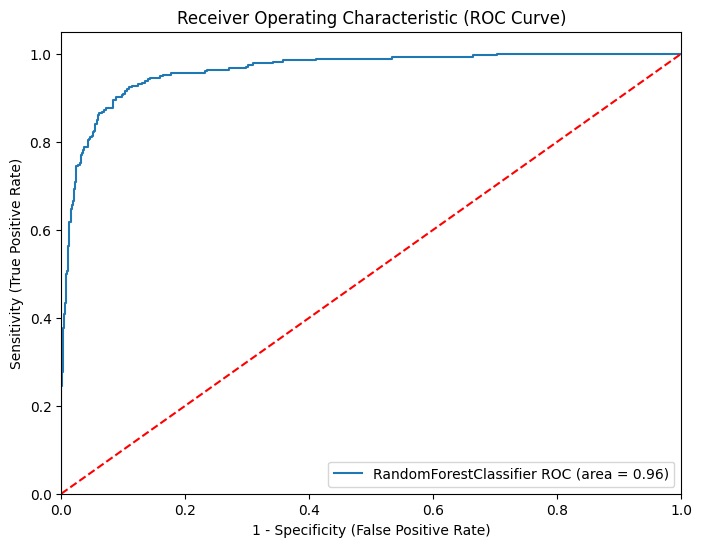

In [417]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Create list of models to evaluate
auc_model = [
    {
        'label': 'RandomForestClassifier',
     'model': RandomForestClassifier(
        n_estimators=300,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=15
    ),
    'AUC':0.73
}
]

# Start figure
plt.figure(figsize=(8, 6))  # Better size for visualization

# Create loop through all models
for algo in auc_model:
    model = algo['model']          # Select the model
    model.fit(X_train, y_train)    # Train the model

    # Compute False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Calculate Area Under the Curve and plot it
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc(fpr, tpr)))

# Plot settings
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guess line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='lower right')
plt.savefig('auc.png')  # Save the plot as an image
plt.show()              # Show the plot
